# Innovative Assignment 

# Natural Language Processing

# Sarcasm Detection on Twitter Dataset

# 21BCE185 - Alay Patel
# 21BCE188 - Bhaumil Patel
# 21BCE191 - Devam Patel

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ReduceLROnPlateau 


import warnings
warnings.filterwarnings("ignore")

import numpy as np
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import regex as re

### Load Dataset

In [14]:
df = pd.read_json('./datasets/Sarcasm_Headlines_Dataset_v2.json', lines=True)
print(df.info())
print(len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
None
28619


### EDA

In [6]:
df_tar = df['is_sarcastic'].value_counts()
labels = ['Not Sarcastic', 'Sarcastic']
sizes = (np.array((df_tar / df_tar.sum())*100))
colors = ['cyan', 'green']

trace = go.Bar(x=labels, y=sizes, marker=dict(color=colors, line=dict(color='black', width=1)), text=sizes)
layout = go.Layout(title='Sarcastic Vs Acclaim', xaxis=dict(title='Category'), yaxis=dict(title='Percentage'), showlegend=True)
fig = go.Figure(data=trace, layout=layout)
fig.show()



all_words = df['headline'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Frequently Occuring words in Headlines'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar')

### Data preprocessing

In [7]:
print("Before Preprocessing")

df.head(5).headline

Before Preprocessing


0    thirtysomething scientists unveil doomsday clo...
1    dem rep. totally nails why congress is falling...
2    eat your veggies: 9 deliciously different recipes
3    inclement weather prevents liar from getting t...
4    mother comes pretty close to using word 'strea...
Name: headline, dtype: object

In [8]:
lem = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
punctuations = string.punctuation

In [9]:
def clean_text(news):
    news = news.lower()
    news = re.sub("\\n", "", news)
    
    words = list(news.split())
    
    words = [lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if w not in punctuations]
    words = [w for w in words if w not in stop_words]
    #words = [''.join(x for x in w if x.isalpha()) for w in words]

    clean_sen = " ".join(words)
    
    return clean_sen

In [10]:
df['headline_clean'] = df.headline.apply(lambda news: clean_text(news)) 
X_train, X_test, y_train, y_test = train_test_split(df['headline_clean'], df['is_sarcastic'], test_size=0.2, stratify=df['is_sarcastic'])


In [11]:
df.head(5).headline_clean

0    thirtysomething scientists unveil doomsday clo...
1    dem rep. totally nail why congress be fall sho...
2    eat your veggies: 9 deliciously different recipes
3      inclement weather prevent liar from get to work
4    mother come pretty close to use word 'streamin...
Name: headline_clean, dtype: object

### Tokenization and padding

In [12]:
max_words, max_len = 20000, 60
tokenizer = Tokenizer(num_words=max_words, oov_token='<00V>')
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# PyTorch

In [11]:
X_train_seq=np.array(X_train_seq)
X_test_seq=np.array(X_test_seq)
y_train=np.array(y_train)
y_test=np.array(y_test)

LSTM Model training
Epoch 1/10, Train Loss: 0.5565, Train Acc: 0.6623, Test Loss: 0.4451, Test Acc: 0.7762
Epoch 2/10, Train Loss: 0.3912, Train Acc: 0.8093, Test Loss: 0.3751, Test Acc: 0.8092
Epoch 3/10, Train Loss: 0.2994, Train Acc: 0.8647, Test Loss: 0.3603, Test Acc: 0.8124
Epoch 4/10, Train Loss: 0.2275, Train Acc: 0.9004, Test Loss: 0.3484, Test Acc: 0.8419
Epoch 5/10, Train Loss: 0.1733, Train Acc: 0.9299, Test Loss: 0.3818, Test Acc: 0.8382
Epoch 6/10, Train Loss: 0.1277, Train Acc: 0.9499, Test Loss: 0.4253, Test Acc: 0.8330
Epoch 7/10, Train Loss: 0.0949, Train Acc: 0.9641, Test Loss: 0.4907, Test Acc: 0.8379
Epoch 8/10, Train Loss: 0.0734, Train Acc: 0.9744, Test Loss: 0.4976, Test Acc: 0.8412
Epoch 9/10, Train Loss: 0.0567, Train Acc: 0.9809, Test Loss: 0.5803, Test Acc: 0.8377
Epoch 10/10, Train Loss: 0.0416, Train Acc: 0.9867, Test Loss: 0.6355, Test Acc: 0.8374


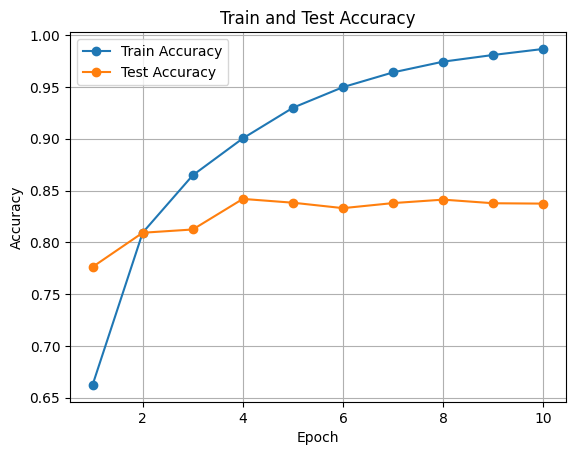

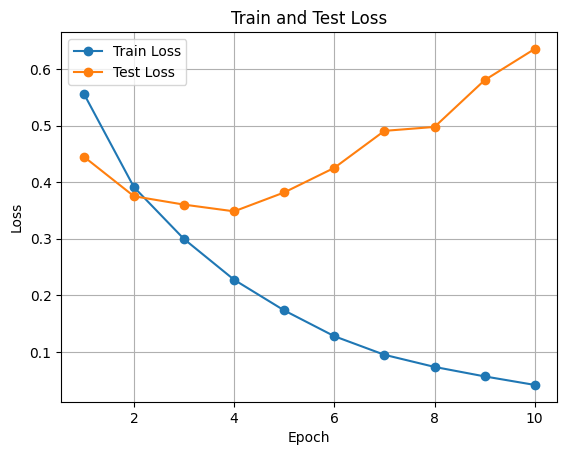

GRU Model Training
Epoch 1/10, Train Loss: 0.5499, Train Acc: 0.6736, Test Loss: 0.4433, Test Acc: 0.7626
Epoch 2/10, Train Loss: 0.3842, Train Acc: 0.8156, Test Loss: 0.3795, Test Acc: 0.8136
Epoch 3/10, Train Loss: 0.2962, Train Acc: 0.8687, Test Loss: 0.3640, Test Acc: 0.8208
Epoch 4/10, Train Loss: 0.2269, Train Acc: 0.9021, Test Loss: 0.3678, Test Acc: 0.8393
Epoch 5/10, Train Loss: 0.1758, Train Acc: 0.9284, Test Loss: 0.3852, Test Acc: 0.8346
Epoch 6/10, Train Loss: 0.1307, Train Acc: 0.9505, Test Loss: 0.4136, Test Acc: 0.8419
Epoch 7/10, Train Loss: 0.0959, Train Acc: 0.9636, Test Loss: 0.4679, Test Acc: 0.8438
Epoch 8/10, Train Loss: 0.0690, Train Acc: 0.9751, Test Loss: 0.5004, Test Acc: 0.8470
Epoch 9/10, Train Loss: 0.0529, Train Acc: 0.9825, Test Loss: 0.5681, Test Acc: 0.8368
Epoch 10/10, Train Loss: 0.0386, Train Acc: 0.9876, Test Loss: 0.6221, Test Acc: 0.8480


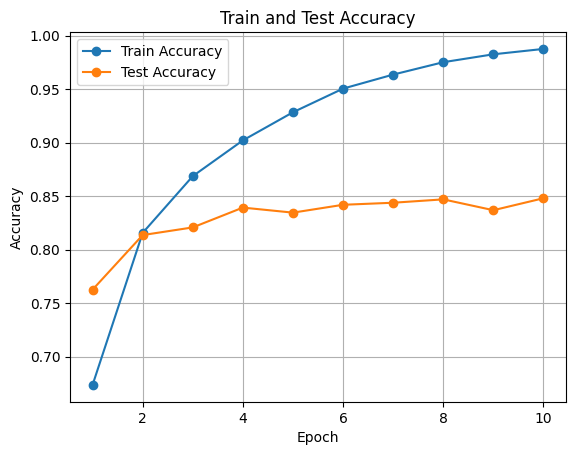

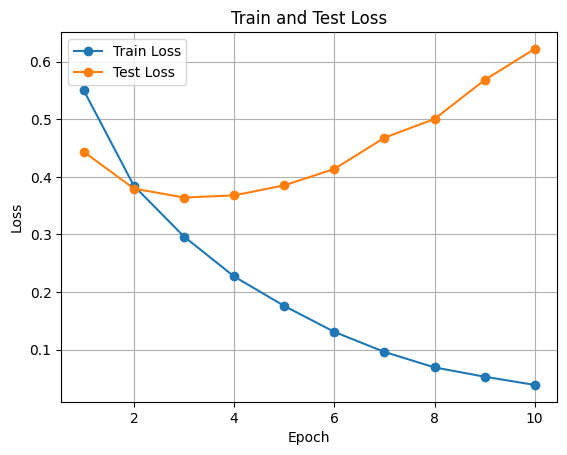

In [32]:
train_sequences = torch.tensor(X_train_seq, dtype=torch.long)
train_labels = torch.tensor(y_train, dtype=torch.float)
test_sequences = torch.tensor(X_test_seq, dtype=torch.long)
test_labels = torch.tensor(y_test, dtype=torch.float)

train_data = TensorDataset(train_sequences, train_labels)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data = TensorDataset(test_sequences, test_labels)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, dropout=0.2, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.embed(x)
        x, _ = self.lstm(x)
        x = torch.max(x, dim=1)[0]
        x = self.dropout(x)
        x = self.fc(x)
        return x

class GRUModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.gru = nn.GRU(embed_size, hidden_size, dropout=0.2, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.embed(x)
        x, _ = self.gru(x)
        x = torch.max(x, dim=1)[0]
        x = self.dropout(x)
        x = self.fc(x)
        return x



def train(model, optimizer, loss_fn, train_loader, test_loader, num_epochs):
    acc_test=[]
    ls_test=[]
    acc_train=[]
    ls_train=[]
    ep=[]
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_acc = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            train_acc += (outputs.squeeze() > 0.5).float().eq(labels).sum().item()

        model.eval()
        test_loss = 0.0
        test_acc = 0.0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
            test_loss += loss.item() * inputs.size(0)
            test_acc += (outputs.squeeze() > 0.5).float().eq(labels).sum().item()

        train_loss /= len(train_loader.dataset)
        train_acc /= len(train_loader.dataset)
        test_loss /= len(test_loader.dataset)
        test_acc /= len(test_loader.dataset)


        ep.append(epoch+1)
        acc_test.append(test_acc)
        ls_test.append(test_loss)
        acc_train.append(train_acc)
        ls_train.append(train_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

    plt.plot(ep, acc_train, marker='o', linestyle='-', label='Train Accuracy')
    plt.plot(ep, acc_test, marker='o', linestyle='-', label='Test Accuracy')
    plt.title('Train and Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()  # Show legend
    plt.grid(True)
    plt.show()
    
    
    plt.plot(ep, ls_train, marker='o', linestyle='-', label='Train Loss')
    plt.plot(ep, ls_test, marker='o', linestyle='-', label='Test Loss')
    plt.title('Train and Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()  # Show legend
    plt.grid(True)
    plt.show()
    
    

vocab_size = max_words + 1
embed_size = 64
hidden_size = 32

lstm_model = LSTMModel(vocab_size, embed_size, hidden_size)
gru_model = GRUModel(vocab_size, embed_size, hidden_size)

loss_fn = nn.BCEWithLogitsLoss()

lstm_optimizer = optim.Adam(lstm_model.parameters())
print("LSTM Model training")
train(lstm_model, lstm_optimizer, loss_fn, train_loader, test_loader, num_epochs=10)

gru_optimizer = optim.Adam(gru_model.parameters())
print("GRU Model Training")
train(gru_model, gru_optimizer, loss_fn, train_loader, test_loader, num_epochs=10)


# BiLSTM

In [16]:
train_sequences = torch.tensor(X_train_seq, dtype=torch.long)
test_sequences = torch.tensor(X_test_seq, dtype=torch.long)
train_labels = torch.tensor(y_train, dtype=torch.float)
test_labels = torch.tensor(y_test, dtype=torch.float)

class BiLSTM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(BiLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.dropout = nn.Dropout(0.2)
        self.bilstm = nn.LSTM(embed_size, hidden_size, num_layers=1, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(hidden_size*2, 16)
        self.fc2 = nn.Linear(16, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        dropped = self.dropout(embedded)
        lstm_out, _ = self.bilstm(dropped)
        max_pool, _ = torch.max(lstm_out, 1)
        fc1_out = torch.relu(self.fc1(max_pool))
        fc1_dropped = self.dropout(fc1_out)
        output = self.sigmoid(self.fc2(fc1_dropped))
        return output

max_words = 20000
embed_size = 60
hidden_size = 32
output_size = 1
model = BiLSTM(max_words, embed_size, hidden_size, output_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i in range(0, len(train_sequences), batch_size):
        inputs = train_sequences[i:i+batch_size]
        labels = train_labels[i:i+batch_size]
        
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_sequences)}")

model.eval()
with torch.no_grad():
    train_outputs = model(train_sequences)
    test_outputs = model(test_sequences)
    train_preds = (train_outputs.squeeze() >= 0.5).long()
    test_preds = (test_outputs.squeeze() >= 0.5).long()

train_acc = (train_preds == train_labels.long()).float().mean().item()
test_acc = (test_preds == test_labels.long()).float().mean().item()

print("BiLSTM Training Accuracy:", train_acc)
print("BiLSTM Testing Accuracy:", test_acc)


Epoch 1, Loss: 0.018056297328280006
Epoch 2, Loss: 0.013652017383914921
Epoch 3, Loss: 0.011277825462620288
Epoch 4, Loss: 0.00961779804664763
Epoch 5, Loss: 0.008372043575957291
BiLSTM Training Accuracy: 0.9380214214324951
BiLSTM Testing Accuracy: 0.8445143103599548
